In [1042]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [1043]:
df = pd.read_csv('netflix_dataset.csv')

In [1044]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB


In [1045]:
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


## Clean Data

In [1245]:
df.isnull().sum()

show_id            0
type               0
title              0
director        2541
cast             817
country          827
date_added         0
release_year       0
rating             4
duration           3
listed_in          0
description        0
year_added         0
dtype: int64

In [1211]:
def analyse_missing_value(df):
    missing_value = df.isnull().sum()
    missing_percentage = (missing_value/len(df))*100
    missing_df = pd.DataFrame({
        'Missing Value': missing_value,
        'Percentage': missing_percentage.round(2)
    })
    print("\nMissing Value Analysis:")
    print(missing_df[missing_df['Missing Value']>0].sort_values('Missing Value', ascending = False))

analyse_missing_value(df)
print("\n=============================================")
print("\nContent Type Distribution:")
print(df['type'].value_counts())


Missing Value Analysis:
          Missing Value  Percentage
director           2541       29.18
country             827        9.50
cast                817        9.38
rating                4        0.05
duration              3        0.03


Content Type Distribution:
type
Movie      6131
TV Show    2578
Name: count, dtype: int64


In [1215]:
df['listed_in'] = df['listed_in'].apply(lambda x: ', '.join([genre for genre in x.split(', ') if genre != 'International TV Shows']))
df['listed_in'] = df['listed_in'].apply(lambda x: ', '.join([genre for genre in x.split(', ') if genre != 'International Movies']))

In [1049]:
# # Fill null values in specific columns... NaN -> Unknown
# df['director'] = df['director'].fillna('Unknown')
# df['cast'] = df['cast'].fillna('Unknown')
# df['country'] = df['country'].fillna('Unknown')
# df['date_added'] = df['date_added'].fillna('Unknown')
# df['rating'] = df['rating'].fillna('Unknown')
# df['duration'] = df['duration'].fillna('Unknown')

## Exploratory Data Analysis

Text(0, 0.5, 'Cantidad')

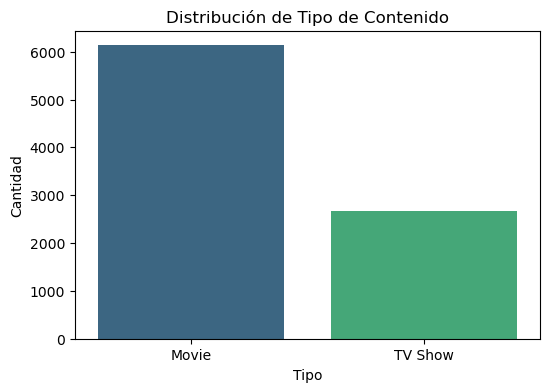

In [1051]:
plt.figure(figsize=(6,4))
sns.countplot(x='type', hue='type', data=df, palette='viridis', legend=False)
plt.title('Distribución de Tipo de Contenido')
plt.xlabel('Tipo')
plt.ylabel('Cantidad')

Text(0, 0.5, 'Cantidad de Estrenos')

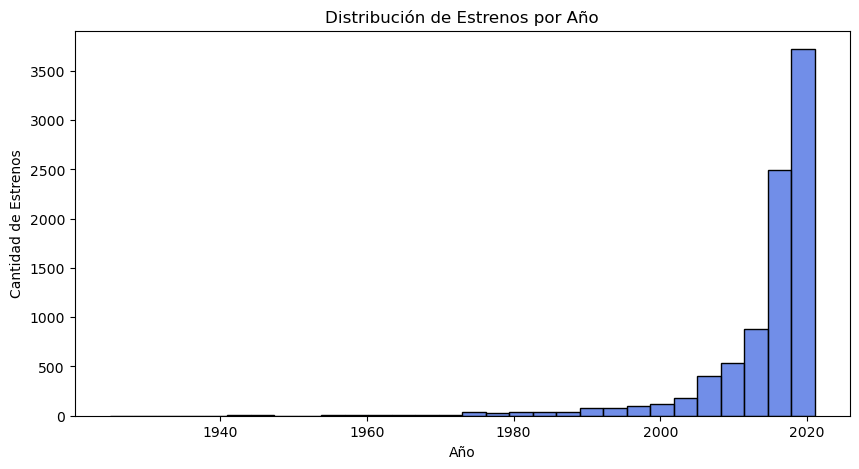

In [1052]:
plt.figure(figsize=(10,5))
sns.histplot(df['release_year'], bins=30, color='royalblue')
plt.title('Distribución de Estrenos por Año')
plt.xlabel('Año')
plt.ylabel('Cantidad de Estrenos')

Text(0, 0.5, 'País')

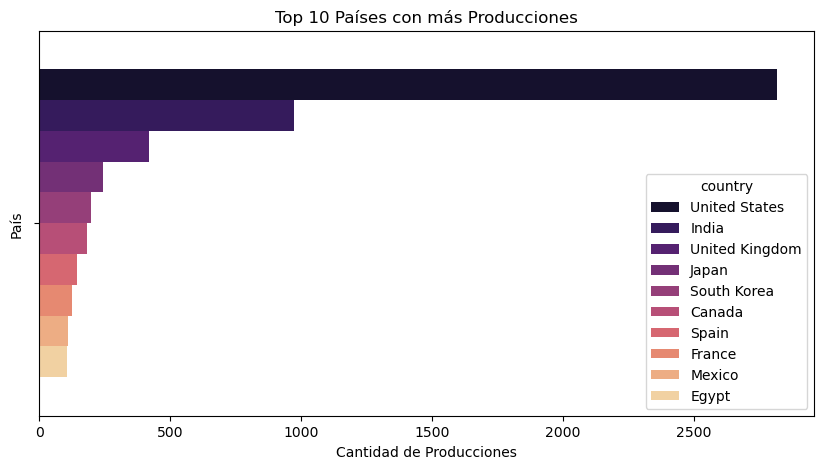

In [1053]:
top_countries = df['country'].value_counts().head(10)

plt.figure(figsize=(10,5))
sns.barplot(x=top_countries.values, hue=top_countries.index, palette='magma')
plt.title('Top 10 Países con más Producciones')
plt.xlabel('Cantidad de Producciones')
plt.ylabel('País')

Text(0.5, 1.0, 'Top 10 Géneros')

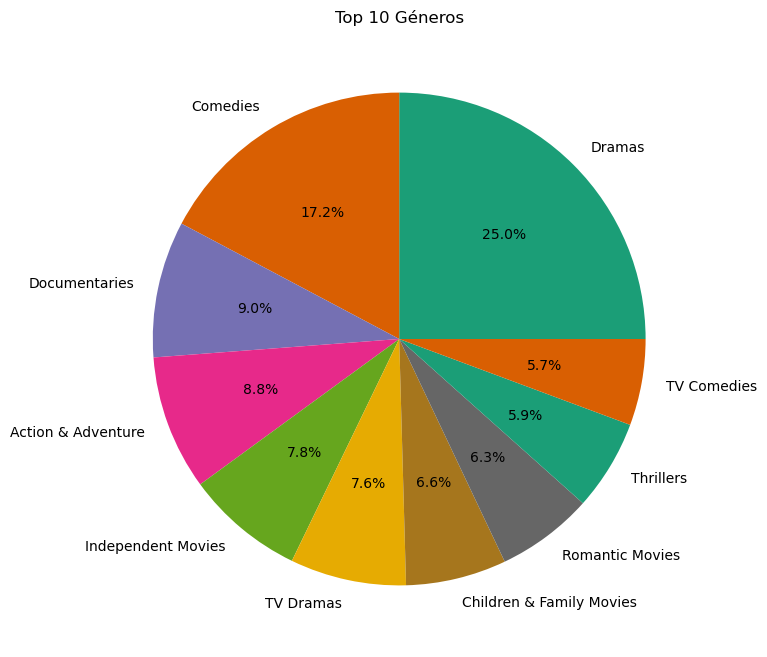

In [1221]:
genres = df['listed_in'].str.split(', ').explode()
top_genres = genres.value_counts().head(10)

plt.figure(figsize=(8, 8))
plt.pie(top_genres, labels=top_genres.index, autopct='%1.1f%%', colors=sns.color_palette('Dark2', len(top_genres)))
plt.title('Top 10 Géneros')

In [1054]:
df.shape

(8807, 12)

In [1055]:
def analyse_missing_value(df):
    missing_value = df.isnull().sum()
    missing_percentage = (missing_value/len(df))*100
    missing_df = pd.DataFrame({
        'Missing Value': missing_value,
        'Percentage': missing_percentage.round(2)
    })
    print("\nMissing Value Analysis:")
    print(missing_df[missing_df['Missing Value']>0].sort_values('Missing Value', ascending = False))

analyse_missing_value(df)
print("\n=============================================")
print("\nContent Type Distribution:")
print(df['type'].value_counts())


Missing Value Analysis:
            Missing Value  Percentage
director             2634       29.91
country               831        9.44
cast                  825        9.37
date_added             10        0.11
rating                  4        0.05
duration                3        0.03


Content Type Distribution:
type
Movie      6131
TV Show    2676
Name: count, dtype: int64


In [1056]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
import nltk
from nltk.corpus import stopwords
import re
from sklearn.preprocessing import MinMaxScaler
from sentence_transformers import SentenceTransformer
from nltk.tokenize import word_tokenize
from gensim.models import Word2Vec
from sklearn.cluster import KMeans
import tensorflow as tf
import tensorflow_hub as hub
from scipy.sparse import hstack

In [1091]:
# Download required NLTK data
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('punkt_tab')

[nltk_data] Downloading package stopwords to /Users/ferp/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /Users/ferp/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package punkt_tab to /Users/ferp/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.


True

In [1192]:
class AdvancedNetflixRecommender:
    def __init__(self, df):
        self.df = df.copy()
        # Fill NaN values
        self.df['description'] = self.df['description'].fillna('')
        self.df['director'] = self.df['director'].fillna('')
        self.df['cast'] = self.df['cast'].fillna('')
        self.df['listed_in'] = self.df['listed_in'].fillna('')
        
        # Initialize models
        self.bert_model = SentenceTransformer('paraphrase-MiniLM-L6-v2')
        self.init_models()

    def clean_text(self, text):
        """Clean and preprocess text"""
        text = text.lower()
        text = re.sub(r'[^\w\s]', '', text)
        tokens = word_tokenize(text)
        stop_words = set(stopwords.words('english'))
        tokens = [t for t in tokens if t not in stop_words]
        return ' '.join(tokens)

    def init_models(self):
        """Initialize all component models"""
        # Process descriptions with BERT
        print("Processing descriptions with BERT...")
        self.description_embeddings = self.bert_model.encode(self.df['description'].tolist())
        
        # Create TF-IDF vectors for different features
        print("Creating TF-IDF vectors...")
        self.tfidf = TfidfVectorizer(stop_words='english')
        self.genre_matrix = self.tfidf.fit_transform(self.df['listed_in'])
        
        # Train Word2Vec on descriptions
        print("Training Word2Vec model...")
        descriptions_tokens = [word_tokenize(self.clean_text(desc)) 
                             for desc in self.df['description']]
        self.word2vec_model = Word2Vec(sentences=descriptions_tokens, 
                                     vector_size=1000, 
                                     window=10, 
                                     min_count=1)
        
        # Create description embeddings using Word2Vec
        self.desc_w2v_embeddings = np.array([
            np.mean([self.word2vec_model.wv[word] 
                    for word in word_tokenize(self.clean_text(desc))
                    if word in self.word2vec_model.wv]
                   or [np.zeros(1000)], axis=0)
            for desc in self.df['description']
        ])
        
        # Cluster similar content
        print("Clustering content...")
        self.n_clusters = 10
        combined_features = np.concatenate([
            self.description_embeddings,
            self.desc_w2v_embeddings
        ], axis=1)
        
        self.kmeans = KMeans(n_clusters=self.n_clusters, random_state=42)
        self.clusters = self.kmeans.fit_predict(combined_features)
        self.df['cluster'] = self.clusters

    def get_description_similarity(self, idx):
        """Get similarity scores based on BERT description embeddings"""
        return cosine_similarity(
            self.description_embeddings[idx].reshape(1, -1),
            self.description_embeddings
        ).flatten()

    def get_genre_similarity(self, idx):
        """Get similarity scores based on genre TF-IDF"""
        return cosine_similarity(
            self.genre_matrix[idx], 
            self.genre_matrix
        ).flatten()

    def get_w2v_similarity(self, idx):
        """Get similarity scores based on Word2Vec embeddings"""
        return cosine_similarity(
            self.desc_w2v_embeddings[idx].reshape(1, -1),
            self.desc_w2v_embeddings
        ).flatten()

    def get_recommendations(self, title, n_recommendations=5, weights=None):
        try:
            # Default weights if none provided
            if weights is None:
                weights = {
                    'description': 0.4,
                    'genre': 0.3,
                    'w2v': 0.3
                }
            
            # Find index of the title
            idx = self.df[self.df['title'] == title].index[0]
            cluster = self.clusters[idx]
            
            # Get similarity scores from different components
            desc_similarity = self.get_description_similarity(idx)
            genre_similarity = self.get_genre_similarity(idx)
            w2v_similarity = self.get_w2v_similarity(idx)
            
            # Combine similarity scores with weights
            combined_similarity = (
                weights['description'] * desc_similarity +
                weights['genre'] * genre_similarity +
                weights['w2v'] * w2v_similarity
            )
            
            # Boost scores for items in the same cluster
            cluster_boost = 0.2
            combined_similarity[self.clusters == cluster] += cluster_boost
            
            # Get top similar indices (excluding the input title)
            similar_indices = combined_similarity.argsort()[::-1][1:n_recommendations+1]
            
            recommendations = []
            for i in similar_indices:
                recommendations.append({
                    'title': self.df.iloc[i]['title'],
                    'type': self.df.iloc[i]['type'],
                    'description': self.df.iloc[i]['description'],
                    'genre': self.df.iloc[i]['listed_in'],
                    'similarity_score': combined_similarity[i],
                    'cluster': self.clusters[i]
                })
            
            return recommendations
        
        except IndexError:
            return f"Title '{title}' not found in the dataset."

    def get_cluster_recommendations(self, cluster_id, n_recommendations=5):
        """Get top recommendations from a specific cluster"""
        cluster_items = self.df[self.df['cluster'] == cluster_id]
        return cluster_items.sample(min(n_recommendations, len(cluster_items)))

    def analyze_user_preferences(self, watched_titles):
        """Analyze user preferences based on watch history"""
        watched_indices = [self.df[self.df['title'] == title].index[0] 
                          for title in watched_titles if title in self.df['title'].values]
        
        if not watched_indices:
            return "No valid titles found in watch history."
        
        # Get average embeddings for watched content
        avg_desc_embedding = np.mean(self.description_embeddings[watched_indices], axis=0)
        avg_w2v_embedding = np.mean(self.desc_w2v_embeddings[watched_indices], axis=0)
        
        # Find most common cluster
        preferred_cluster = self.df.iloc[watched_indices]['cluster'].mode()[0]
        
        # Get genre preferences
        genre_counts = (self.df.iloc[watched_indices]['listed_in']
                       .str.split(', ')
                       .explode()
                       .value_counts())
        
        return {
            'preferred_cluster': preferred_cluster,
            'top_genres': genre_counts.head().to_dict(),
            'avg_embeddings': {
                'description': avg_desc_embedding,
                'w2v': avg_w2v_embedding
            }
        }

In [1257]:
print("Initializing recommender system...")
recommender = AdvancedNetflixRecommender(df)

def print_recommendations(title):
    print(f"\nGetting recommendations for '{title}'...")
    recommendations = recommender.get_recommendations(title)
        
    
    if isinstance(recommendations, str):
        print(recommendations)
    else:
        for i, rec in enumerate(recommendations, 1):
            print(f"\n{i}. {rec['title']}")
            print(f"Type: {rec['type']}")
            print(f"Genre: {rec['genre']}")
            print(f"Cluster: {rec['cluster']}")




print_recommendations("Dexter")

Initializing recommender system...
Processing descriptions with BERT...
Creating TF-IDF vectors...
Training Word2Vec model...
Clustering content...

Getting recommendations for 'Kung Fu Panda'...

1. Kung Fu Panda: Secrets of the Scroll
Type: Movie
Genre: Children & Family Movies, Comedies
Cluster: 8

2. Shiva VS Autobots
Type: Movie
Genre: Children & Family Movies
Cluster: 8

3. Dragons: Dawn of the Dragon Racers
Type: Movie
Genre: Children & Family Movies, Comedies
Cluster: 8

4. Little Singham Bandarpur Mein Hu Ha Hu
Type: Movie
Genre: Children & Family Movies, Comedies
Cluster: 8

5. Firedrake the Silver Dragon
Type: Movie
Genre: Children & Family Movies
Cluster: 8
